# Setup

Mean reversion strategy with the goal to sell the asset if it is trading more than 3 standard deviations above the rolling mean and to buy the asset if it is trading more than 3 standard deviations below the rolling mean.

In [1]:
from backtester.data_handler import DataHandler
from backtester.backtester import Backtester
from backtester.strategies import Strategy

symbol = "HE"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Backtesting

Final Portfolio Value: 10725.54
Total Return: 7.26%
Annualized Return: 7.29%
Annualized Volatility: 18.32%
Sharpe Ratio: 0.40
Sortino Ratio: 0.53
Maximum Drawdown: -23.37%


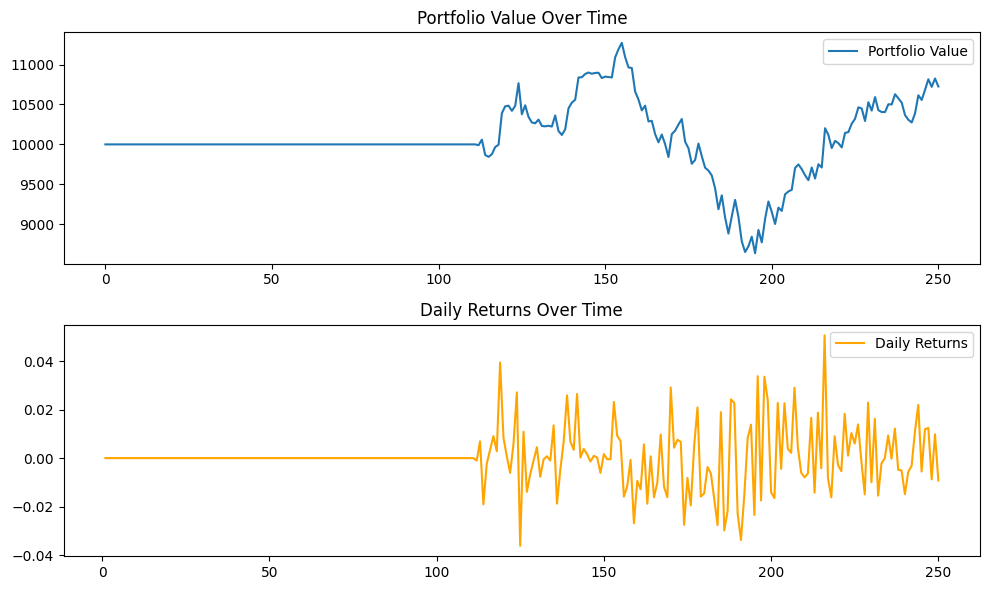

In [2]:
data = DataHandler(symbol=symbol, start_date=start_date, end_date=end_date).load_data()

# Define your strategy, indicators, and signal logic here
strategy = Strategy(
    indicators={
        "sma_50": lambda row: row["close"].rolling(window=50).mean(),
        "std_3": lambda row: row["close"].rolling(window=50).std() * 3,
        "std_3_upper": lambda row: row["sma_50"] + row["std_3"],
        "std_3_lower": lambda row: row["sma_50"] - row["std_3"],
    },
    signal_logic=lambda row: (
        1
        if row["close"] < row["std_3_lower"]
        else -1 if row["close"] > row["std_3_upper"] else 0
    ),
)
data = strategy.generate_signals(data)

backtester = Backtester()
backtester.backtest(data)
backtester.calculate_performance()

Final Portfolio Value: 12062.36
Total Return: 20.62%
Annualized Return: 20.71%
Annualized Volatility: 13.12%
Sharpe Ratio: 1.58
Sortino Ratio: 1.71
Maximum Drawdown: -7.19%


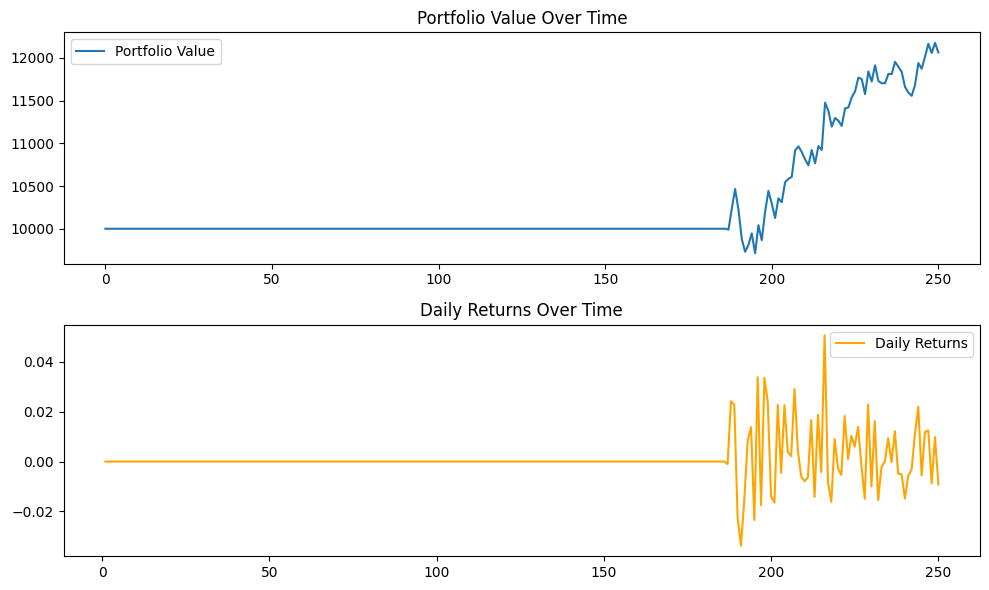

In [3]:
data = DataHandler(symbol=symbol, start_date=start_date, end_date=end_date).load_data()

# Define your strategy, indicators, and signal logic here
strategy = Strategy(
    indicators={
        "sma_50": lambda row: row["close"].rolling(window=50).mean(),
        "std_3": lambda row: row["sma_50"].std() * 3,
        "std_3_upper": lambda row: row["sma_50"] + row["std_3"],
        "std_3_lower": lambda row: row["sma_50"] - row["std_3"],
    },
    signal_logic=lambda row: (
        1
        if row["close"] < row["std_3_lower"]
        else -1 if row["close"] > row["std_3_upper"] else 0
    ),
)
data = strategy.generate_signals(data)

backtester = Backtester()
backtester.backtest(data)
backtester.calculate_performance()